<h1>2023.05.25. 강의 시간내 실습</h1>

In [77]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from keras.utils import to_categorical
import seaborn as sns

In [78]:
iris = load_iris()

In [79]:
iris_features = iris.feature_names

In [80]:
iris_features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [81]:
df_data = pd.DataFrame(iris.data, columns = iris_features)
df_labels = pd.DataFrame(iris.target, columns = ['label'])

In [82]:
data=pd.concat([df_data,df_labels],axis=1)

In [83]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [84]:
X = data.iloc[:,0:4].values
y = data.iloc[:,4].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [85]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [86]:
X.shape

(150, 4, 1)

In [87]:
encoder = LabelEncoder()

y_encoded = encoder.fit_transform(y)

y_one_hot = to_categorical(y_encoded)

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=0)

In [89]:
n_steps = X.shape[1]
n_steps

4

In [90]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [91]:
def build_model(): 
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0048), metrics=['accuracy'])
    
    return model

model = build_model() 
print("input_shape => ", n_steps, n_features)
model.summary()

input_shape =>  4 1
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 3, 64)             192       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 50)                3250      
                                                                 
 dense_13 (Dense)            (None, 3)                 153       
                                                                 
Total params: 3,595
Trainable params: 3,595
Non-trainable params: 0
________________________________

c:\Users\kkh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [92]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
4/4 [==============================] - 1s 55ms/step - loss: 1.0891 - accuracy: 0.3750 - val_loss: 1.1015 - val_accuracy: 0.2000
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.9549 - accuracy: 0.5000 - val_loss: 1.0052 - val_accuracy: 0.5667
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 0.8659 - accuracy: 0.6917 - val_loss: 0.8869 - val_accuracy: 0.5667
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.7508 - accuracy: 0.7167 - val_loss: 0.7612 - val_accuracy: 0.6333
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6423 - accuracy: 0.8083 - val_loss: 0.6505 - val_accuracy: 0.7000
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.5497 - accuracy: 0.7833 - val_loss: 0.5676 - val_accuracy: 0.7000
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.4753 - accuracy: 0.8750 - val_loss: 0.4399 - val_accuracy: 0.9333
Epoch 8/100
4/4 [===

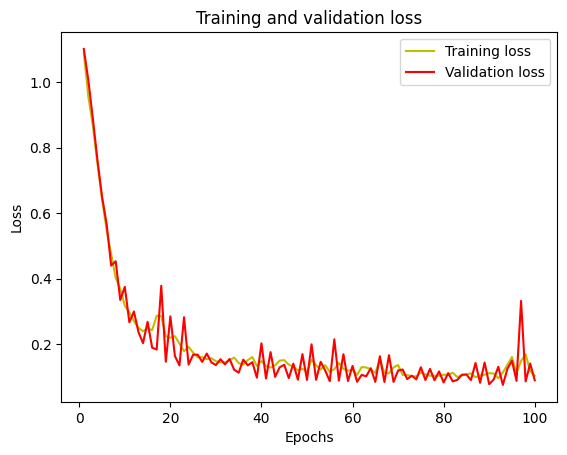

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

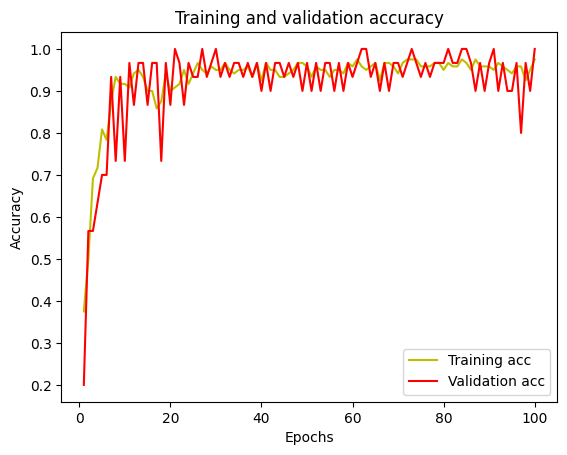

In [94]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [95]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
